# Tennis points won

In the `tennis.csv` files of games played by Federer.

Does Federer score more total points than his opponent on average in a game?

In [ ]:
'''

For this question, I chose 
'player1 total points won' vs 'player2 total points won' columns.

But better options could have been
'player1 total points total' and 'player2 total points total' columns.

I dropped all the NaN rows;
summed up the rows where Federal has more points,
less points, and tied;
made a pie chart to help visualize the sums;
and finally answered the question.

'''

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()

data_fetch = '/Users/celiagoogle/Documents/GitHub/m2-4-stats/data/tennis.csv'
tennis = pd.read_csv(data_fetch)

In [2]:
# chose the relevant columns
tennis = tennis[['year', 'player1 name', 'player1 total points won', 'player2 name', 'player2 total points won']]
tennis

,year,player1 name,player1 total points won,player2 name,player2 total points won
0,1998,Roger Federer,41.0,Andre Agassi,62.0
1,1998,Roger Federer,65.0,Guillaume Raoux,41.0
2,1998,Roger Federer,79.0,Richard Fromberg,69.0
3,1998,Roger Federer,60.0,Jan Siemerink,70.0
4,1998,Roger Federer,NaN,Orlin Stanoytchev,NaN
...,...,...,...,...,...
1174,2012,Roger Federer,130.0,Rafael Nadal,146.0
1175,2012,Roger Federer,55.0,Nikolay Davydenko,31.0
1176,2012,Roger Federer,60.0,Grega Zemlja,39.0
1177,2012,Roger Federer,92.0,Andreas Seppi,81.0


In [3]:
tennis.dropna()

,year,player1 name,player1 total points won,player2 name,player2 total points won
0,1998,Roger Federer,41.0,Andre Agassi,62.0
1,1998,Roger Federer,65.0,Guillaume Raoux,41.0
2,1998,Roger Federer,79.0,Richard Fromberg,69.0
3,1998,Roger Federer,60.0,Jan Siemerink,70.0
5,1998,Roger Federer,63.0,Lucas Arnold Ker,73.0
...,...,...,...,...,...
1173,2012,Roger Federer,96.0,Juan Martin Del Potro,68.0
1174,2012,Roger Federer,130.0,Rafael Nadal,146.0
1175,2012,Roger Federer,55.0,Nikolay Davydenko,31.0
1176,2012,Roger Federer,60.0,Grega Zemlja,39.0


In [4]:
federer_more = (tennis['player1 total points won'] > tennis['player2 total points won']).sum()
federer_less = (tennis['player1 total points won'] < tennis['player2 total points won']).sum()
federer_tied = (tennis['player1 total points won'] == tennis['player2 total points won']).sum()
print(f"Federer had more points {federer_more} times")
print(f"Federer had less points {federer_less} times")
print(f"Federer had tied points {federer_tied} times")


Federer had more points 854 times
Federer had less points 166 times
Federer had tied points 7 times


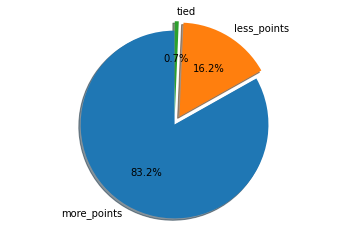

In [5]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'more_points', 'less_points', 'tied'
sizes = [federer_more, federer_less, federer_tied]
explode = (0, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [6]:
# Exercise 1 Answer Does Federer score more total points than his opponent on average in a game?

federer_more > federer_less + federer_tied

True

# 2. College correlations

The `college.csv` filecontains a number of variables for 777 different universities and colleges in the US.

### 2.1

Use a scatterplot matrix to analyze the data and answer the following questions:

1. Which columns are possibly from a normal distribution? Statistically test if this is the case (you'll find a function for it in `scipy.stats`). For each explain if it is or not normally distributed.

2. Of the columns that aren't normally distributed, name which distribution could possibly fit them? (Use your research skills)

3. Give 3 pairs of columns that are highly correlated? Give their correlation coefficients.

4. Give 3 column pairs that are not correlated? Give their correlation coefficients.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data_fetch = '/Users/celiagoogle/Documents/GitHub/m2-4-stats/data/college.csv'
colleges = pd.read_csv(data_fetch)
colleges.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [8]:
# bell curve to find normality

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data_fetch = '/Users/celiagoogle/Documents/GitHub/m2-4-stats/data/college.csv'
colleges = pd.read_csv(data_fetch)
colleges

sns.pairplot(colleges)
#sns.pairplot(colleges, hue='Private')

plt.savefig('scatterplot_matrix1')

Error in callback <function flush_figures at 0x7fe2861c4e50> (for post_execute):


KeyboardInterrupt: 

In [ ]:
colleges[['Top25perc', 'Outstate', 'Room.Board','perc.alumni', 'Grad.Rate']].describe()

In [ ]:
# DONE! Exercise 2.1.1.1 Which columns are possibly from a normal distribution? 
'''

Based on a somewhat bell-curve shape around histograms, 
and a column mean that is close to the column's median (50%)
from the colleges.describe() outputs,
here are my guesses:

- Top25perc (mean )
- Outstate
- Room.Board
- perc.alumni
- Grad.Rate

'''

In [ ]:
# DONE! Exercise 2.1.1.2 Statistically test if this is the case (you'll find a function for it in scipy.stats).

from scipy import stats

print(f"Top25per: {stats.normaltest(colleges.Top25perc)}")
print(f"Outstate: {stats.normaltest(colleges.Outstate)}")
print(f"Room.Board: {stats.normaltest(colleges['Room.Board'])}")
print(f"perc.alumni: {stats.normaltest(colleges['perc.alumni'])}")
print(f"Grad.Rate: {stats.normaltest(colleges['Grad.Rate'])}")

In [ ]:
# DONE! Exercise 2.1.1.3 For each explain if it is or not normally distributed.
'''
I set my threshold at:
alpha = 0.05

If p <= alpha: reject the null hypothesis and conclude data does not follow a normal distribution

If p > alpha: the null hypothesis cannot be rejected and conclude data does follow a normal distribution


- Top25perc: p < alpha, the data in this column unlikely came from a normal distribution
- Outstate: p < alpha, the data in this column unlikely came from a normal distribution
- Room.Board: p < the data in this column unlikely came from a normal distribution
- perc.alumni: p < the data in this column unlikely came from a normal distribution
- Grad.Rate: p > alpha, the data in this column likely came from a normal distribution

'''

In [ ]:
# Exercise 2.1.2 Of the columns that aren't normally distributed, 
# name which distribution could possibly fit them? (Use your research skills)
# Ran out of time
'''
- Top25perc: 
- Outstate: 
- Room.Board:
- perc.alumni: 

'''


In [ ]:
# Exercise 2.1.3
# Give 3 pairs of columns that are highly correlated? 
# Give their correlation coefficients.

# Ran out of time

In [ ]:
# Exercise 2.1.4
# Give 3 column pairs that are not correlated? 
# Give their correlation coefficients.

# Ran out of time

### 2.2 Boxplot

Make a boxplot of private vs outstate colleges. It should look like:

![](boxplort.png)

In [ ]:
# DONE! Exercise 2.2 Boxplot
sns.boxplot(x='Private', y='Outstate', data=colleges);

# 3. Auto data

The `auto.csv` data file is malformed.

Fix it (using only python) so that it can be read into pandas, and then give a scatterplot matrix of horsepower, weight, year and mpg.

Did cars get more efficient over time? Make an argument on this question.

In [ ]:
data_fetch = '/Users/celiagoogle/Documents/GitHub/m2-4-stats/data/auto.csv'
auto = pd.read_csv(data_fetch)

auto.loc[1]
#auto.head()

In [ ]:
# dufficult
# Ran out of time

import pandas as pd

data_fetch = '/Users/celiagoogle/Documents/GitHub/m2-4-stats/data/auto.csv'
auto = pd.read_csv(data_fetch, sep='\s+')


auto.head(2)
auto.info()
#auto.columns

### 3.2 Auto Statistics

What is the mean, median and standard deviation of each quantitative feature?


In [ ]:
#3.2 2:18:45 stats lecture
# Ran out of time

auto.info()
auto.mean()
auto.std()
auto.median()

### 3.3 data removal

Remove the 10th through 85th observations. 

Does the mean statistically significantly change for each of the columns?



In [ ]:
#auto.dropna([9:84])
# Ran out of time

# 4. Boston housing dataset

You can use `from sklearn.datasets import load_boston` to load the boston housing dataset.

The `load_boston()['DESCR']` will describe columns for you.

Are any of the columns associated with per capita crime rate? If so, show the numeric relationship and give a possible explanation for highly correlated/negatively correlated features

In [ ]:
'''
The code above didn't work for me,
it returned a long string full of "\n", etc.

I ended up spending considerable time trying to fix it.
In the end, I googled to put it in df,
and got an answer from StackOverflow.

'''
# my various attemps to see boston info
from sklearn import datasets
from sklearn.datasets import load_boston
boston = datasets.load_boston()

type(boston)

from sklearn.utils import Bunch
Bunch?

#b = Bunch()
#b['b']
#b['DESCR']
#Bunch["DESCR"]
#Bunch.DESCR
#load_boston()['DESCR']
#X, y = load_boston(return_X_y=True)
#print(X.shape)

In [9]:
# https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset/46379878#46379878
from sklearn import datasets
import pandas as pd

boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['MEDV'] = pd.Series(boston_data.target)
df_boston.head(2)
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Or, also from the same StackOverflow link as above

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['MEDV'] = pd.Series(sklearn_dataset.target)
    return df

df_boston2 = sklearn_to_df(datasets.load_boston())


In [ ]:
# info on column names at
# https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [10]:
df_boston1 = df_boston[['CRIM', 'TAX', 'PTRATIO', 'CHAS', 'MEDV', 'RM']]
df_boston1.head(2)

,CRIM,TAX,PTRATIO,CHAS,MEDV,RM
0,0.00632,296.0,15.3,0.0,24.0,6.575
1,0.02731,242.0,17.8,0.0,21.6,6.421


### 4.2 Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios?




In [11]:
#df_boston.info() no nulls
df_boston1.describe()

,CRIM,TAX,PTRATIO,CHAS,MEDV,RM
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,408.237154,18.455534,0.069170,22.532806,6.284634
std,8.601545,168.537116,2.164946,0.253994,9.197104,0.702617
min,0.006320,187.000000,12.600000,0.000000,5.000000,3.561000
25%,0.082045,279.000000,17.400000,0.000000,17.025000,5.885500
50%,0.256510,330.000000,19.050000,0.000000,21.200000,6.208500
75%,3.677083,666.000000,20.200000,0.000000,25.000000,6.623500
max,88.976200,711.000000,22.000000,1.000000,50.000000,8.780000


In [12]:
# Exercise 4.2.1 Do any of the suburbs of Boston appear to have particularly high crime rates?
df_boston1.CRIM.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [13]:
# Exercise 4.2.1 Answer
'''
The following top 10 in terms of crime rate,
all have values well above the 75% mark of 3.677083

Compared to the mean of 3.613524, the top eight have a crime rate more than 10 times higher.

Compared to the min suburb with 0.006320, the top three have a crime rate more than 10_000 times higher.

'''

crim_sort = df_boston1.CRIM.sort_values(ascending=False)
crim_sort[0:10]


380    88.9762
418    73.5341
405    67.9208
410    51.1358
414    45.7461
404    41.5292
398    38.3518
427    37.6619
413    28.6558
417    25.9406
Name: CRIM, dtype: float64

In [14]:
# Exercise 4.2.2 Do any of the suburbs of Boston appear to have particularly high tax rates?
df_boston1.TAX.describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64

In [15]:
# Exercise 4.2.2 Answer
'''
In the following top 10 in terms of tax rate,
five suburbs have values above the 75% mark of 666.0,
with a 75% higher tax rate than the mean of 408.237154,
and 280% higher rate than the min of 187.

The other five are exactly at the 75% percentile.

'''
tax_sort = df_boston1.TAX.sort_values(ascending=False)
tax_sort[0:10]

488    711.0
489    711.0
490    711.0
491    711.0
492    711.0
377    666.0
403    666.0
407    666.0
406    666.0
405    666.0
Name: TAX, dtype: float64

In [16]:
# Exercise 4.2.3 Do any of the suburbs of Boston appear to have particularly high pupil-teacher ratios?
df_boston1.PTRATIO.describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

In [17]:
# Exercise 4.2.3 Answer
'''
In the following top 10 in terms of the pupil-teacher ratio,
all have values above the 75% mark of 20.200000.

Compared to the mean of 18.455534, all 10 have a higher ratio.

Compared to the min suburb with 12.600000, there's almost ten more pupils per teacher for the top 2.

'''
ptratio_sort = df_boston1.PTRATIO.sort_values(ascending=False)
ptratio_sort[0:10]

354    22.0
355    22.0
134    21.2
127    21.2
128    21.2
130    21.2
131    21.2
132    21.2
133    21.2
129    21.2
Name: PTRATIO, dtype: float64

### 4.3 How many of the suburbs in this data set bound the Charles river?

In [18]:
# Exercise 4.3. Answer

b_chas = (df_boston1['CHAS'] == 1).sum()
b_chas

35

### 4.4 What is the median pupil-teacher ratio among the towns in this data set?

In [19]:
# Exercise 4.4. Answer
df_boston1.PTRATIO.median()

19.05

### 4.5 Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.



In [20]:
# Exercise 4.5.1 Which suburb of Boston has lowest median value of owneroccupied homes?
# Answer
df_boston1[['MEDV']].idxmin() 

MEDV    398
dtype: int64

In [21]:
# Exercise 4.5.2 What are the values of the other predictors for that suburb
df_398 = df_boston1.loc[398]
df_398

CRIM        38.3518
TAX        666.0000
PTRATIO     20.2000
CHAS         0.0000
MEDV         5.0000
RM           5.4530
Name: 398, dtype: float64

In [ ]:
# Exercise 4.5.3 how do those values compare to the overall ranges for those predictors? 
# Ran out of time

In [ ]:
#df_boston.compare(df_398)
# Ran out of time

In [ ]:
# Exercise 4.5.4 Comment on your findings.
# Ran out of time

### 4.6 In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.




In [22]:
# Exercise 4.6.1 In this data set, how many of the suburbs average more than seven rooms per dwelling?
(df_boston1['RM'] > 7).sum()

64

In [23]:
# Exercise 4.6.2 More than eight rooms per dwelling?
(df_boston1['RM'] > 8).sum()

13

In [24]:
# Exercise 4.6.3 Comment on the suburbs that average more than eight rooms per dwelling.

'''

What sticks out most is that all suburbs
with dwellings with more than 8 rooms have very
low crimes rates and all but two bound the Charles River.

Another striking feature is that all but one suburb
has a tax rate lower than the mean. So people in these suburbs
tend to pay less taxes.

These suburbs also have low percentages of lower status of the population
in the 'LSTAT' column, with all having well below the average of 12.653063.

'''

df_boston.loc[df_boston['RM'] > 8]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
224,0.31533,0.0,6.20,0.0,0.5040,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
226,0.38214,0.0,6.20,0.0,0.5040,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6
232,0.57529,0.0,6.20,0.0,0.5070,8.337,73.3,3.8384,8.0,307.0,17.4,385.91,2.47,41.7
233,0.33147,0.0,6.20,0.0,0.5070,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95,48.3
253,0.36894,22.0,5.86,0.0,0.4310,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,42.8
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
